In [5]:
import os
import sys
import numpy as np
from pyhdf.SD import SD, SDC
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
datadir = '/home/tkurihana/scratch-midway2/data/MOD06/01'

In [4]:
filename = 'MYDATML2.A2017001.0610.061.2018029080342.hdf'

In [6]:
ifile = datadir + '/' + filename
hdf = SD(ifile, SDC.READ)

In [13]:
print(hdf.datasets() )

{'Latitude': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 5, 0), 'Longitude': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 5, 1), 'Cloud_Optical_Thickness': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 2), 'Cloud_Effective_Radius': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 3), 'Cloud_Water_Path': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 4), 'Cloud_Optical_Thickness_1621': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 5), 'Cloud_Effective_Radius_1621': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 6), 'Cloud_Water_Path_1621': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 7), 'Cloud_Optical_Thickness_Uncertainty': (('Cell_Along_Swath_5km:atml2', 'Cell_Across_Swath_5km:atml2'), (406, 271), 22, 8), 'Cloud_Effective_Rad

In [19]:
cot = hdf.select('Cloud_Optical_Thickness')

In [20]:
dir(cot)

['_SDS__buildStartCountStride',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_id',
 '_sd',
 'attr',
 'attributes',
 'checkempty',
 'dim',
 'dimensions',
 'endaccess',
 'get',
 'getcal',
 'getcompress',
 'getdatastrs',
 'getfillvalue',
 'getrange',
 'info',
 'iscoordvar',
 'isrecord',
 'ref',
 'set',
 'setcal',
 'setcompress',
 'setdatastrs',
 'setexternalfile',
 'setfillvalue',
 'setrange']

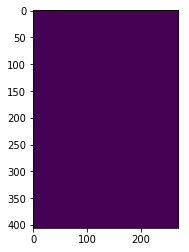

In [21]:
plt.imshow(cot.get())

In [41]:
cot.getrange()

(0, 10000)

In [42]:
cot.info()

('Cloud_Optical_Thickness', 2, [406, 271], 22, 12)

In [40]:
cot.attributes()

{'long_name': 'Cloud Optical Thickness two-channel retrieval using band 7(2.1um) and either band 1(0.65um), 2(0.86um), or 5(1.2um) from best points: not failed in any way, not marked for clear sky restoral',
 'units': 'none',
 'valid_range': [0, 10000],
 '_FillValue': -9999,
 'scale_factor': 0.009999999776482582,
 'add_offset': 0.0,
 'Parameter_Type': 'Output',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'External MODIS geolocation product',
 '1_km_to_5_km_subsampling_description': 'Each value in this dataset does not represent an average of properties over a 5 x 5 km grid box, but rather a single sample from within each 5 km box. Normally, pixels in across-track rows 4 and 9 (counting in the direction of increasing scan number) out of every set of 10 rows are used for subsampling the 1 km retrievals to a 5 km resolution. If the array contents are determined to be all fill values after selecting the default pixel subs

In [72]:
## from trarimon
nan_index=np.where(cot.get() ==cot.attributes()['_FillValue'])   # locate no-data (fill value)
np_cot=cot.get() / cot.attributes()['scale_factor']   # apply scaling (digital number to real data)
np_cot[nan_index]=np.nan    # assign NaN to no-data

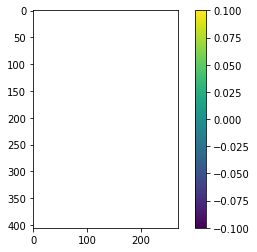

In [73]:
plt.imshow(np_cot)
plt.colorbar()

In [74]:
ndvi_sds = cot
ndvi = cot.get()

## from trarimon
nan_index=np.where(ndvi==ndvi_sds.attributes()['_FillValue'])   # locate no-data (fill value)
ndvi=ndvi / ndvi_sds.attributes()['scale_factor']   # apply scaling (digital number to real data)
ndvi[nan_index]=np.nan    # assign NaN to no-data

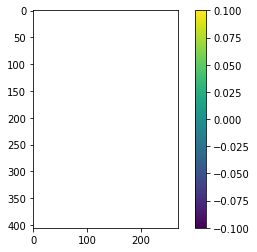

In [75]:
plt.imshow(ndvi)
plt.colorbar()

## CTH: Cloud Top Height

In [22]:
cth = hdf.select('Cloud_Top_Height')
dir(cth)

['_SDS__buildStartCountStride',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_id',
 '_sd',
 'attr',
 'attributes',
 'checkempty',
 'dim',
 'dimensions',
 'endaccess',
 'get',
 'getcal',
 'getcompress',
 'getdatastrs',
 'getfillvalue',
 'getrange',
 'info',
 'iscoordvar',
 'isrecord',
 'ref',
 'set',
 'setcal',
 'setcompress',
 'setdatastrs',
 'setexternalfile',
 'setfillvalue',
 'setrange']

/home/tkurihana/.conda/envs/py3501/lib/python3.6/site-packages/matplotlib/transforms.py:2943: RuntimeWarning: overflow encountered in short_scalars
  elif vmax - vmin <= maxabsvalue * tiny:


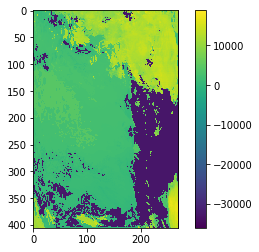

In [24]:
plt.imshow(cth.get())
plt.colorbar()

In [25]:
cth.getrange()

(0, 18000)

In [31]:
cth.getdatastrs()

('Geopotential Height at Retrieved Cloud Top Pressure Level (rounded to nearest 50 m)',
 'meters',
 '',
 '')

In [33]:
cth.info()

('Cloud_Top_Height', 2, [406, 271], 22, 10)

In [36]:
cth.attributes()

{'_FillValue': -32767,
 'valid_range': [0, 18000],
 'long_name': 'Geopotential Height at Retrieved Cloud Top Pressure Level (rounded to nearest 50 m)',
 'units': 'meters',
 'scale_factor': 1.0,
 'add_offset': 0.0,
 'Parameter_Type': 'Output',
 'Cell_Along_Swath_Sampling': [3, 2028, 5],
 'Cell_Across_Swath_Sampling': [3, 1348, 5],
 'Geolocation_Pointer': 'Internal geolocation arrays'}

In [90]:
cth_data = cth.get() 
cth_data.getcal()

AttributeError: 'numpy.ndarray' object has no attribute 'getcal'

In [101]:
cth.getcal()

HDF4Error: getcal (134): Cannot find or get an attribute

In [92]:
a

<bound method SDS.getcal of <pyhdf.SD.SDS object at 0x7fc30280e7f0>>

In [46]:
a = cth.attr('Cloud_Top_Height')

In [86]:
cth.attr('Cloud_Top_Height')

In [53]:
cth._id

262201

In [79]:
cth.getfillvalue()

-32767

In [102]:
offset_index = np.where(cth.get() == cth.attributes()['add_offset'] )

In [105]:
np.asarray(offset_index).shape

(2, 415)

In [58]:
ndvi_sds = cth
ndvi = cth.get()

## from trarimon
nan_index=np.where(ndvi==ndvi_sds.attributes()['_FillValue'])   # locate no-data (fill value)
ndvi=ndvi / ndvi_sds.attributes()['scale_factor']   # apply scaling (digital number to real data)
ndvi[nan_index]=np.nan    # assign NaN to no-data

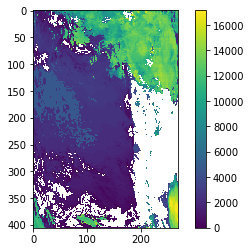

In [70]:
plt.imshow(ndvi)
plt.colorbar()

In [62]:
ndvi.shape

(406, 271)

In [66]:
max(ndvi.flatten() ) , min(ndvi.flatten())

(17150.0, 0.0)

In [106]:
ndvi_sds = cth
ndvi = cth.get()

## from trarimon
nan_index=np.where(ndvi==ndvi_sds.attributes()['_FillValue'])   # locate no-data (fill value)
addoffset_index = np.where(ndvi == ndvi_sds.attributes()['add_offset'] )
ndvi = ndvi - ndvi_sds.attributes()['add_offset']
ndvi=ndvi * ndvi_sds.attributes()['scale_factor']   # apply scaling (digital number to real data)
ndvi[nan_index]=np.nan  

In [108]:
_ndvi_sds = cth
_ndvi = cth.get()
ao_ndvi = ndvi - ndvi_sds.attributes()['add_offset']

In [109]:
res = _ndvi - ao_ndvi

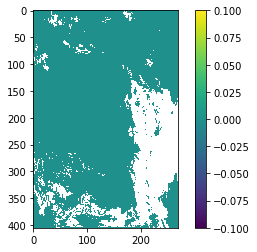

In [110]:
plt.imshow(res)
plt.colorbar()

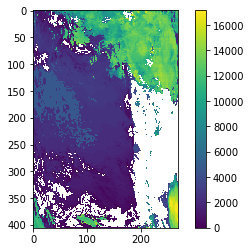

In [107]:
plt.imshow(ndvi)
plt.colorbar()

In [84]:
help(cth)

Help on SDS in module pyhdf.SD object:

class SDS(builtins.object)
 |  The SDS class implements an HDF dataset object.
 |  To create an SDS instance, call the create() or select()
 |  methods of the SD class. To set attributes on an SDS instance,
 |  call the SDS.attr() method to create an attribute instance,
 |  then call the methods of this instance. Attributes can also be
 |  set using the "dot notation".
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __getattr__(self, name)
 |  
 |  __getitem__(self, elem)
 |  
 |  __init__(self, sd, id)
 |      This constructor should not be called by the user program.
 |      Call the SD.create() and SD.select() methods instead.
 |  
 |  __len__(self)
 |  
 |  __setattr__(self, name, value)
 |      Implement setattr(self, name, value).
 |  
 |  __setitem__(self, elem, data)
 |  
 |  attr(self, name_or_index)
 |      Create an SDAttr instance representing an SDS
 |      (dataset) attribute.
 |      
 |      Args::
 |      
 |      

In [100]:
cth.getcompress()

(4, 4)